(540, 2500) (540,) (100, 2500) (100,)


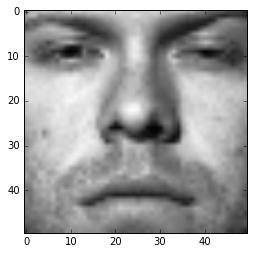

In [7]:
# 1-b Load Data
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data, test_data, test_labels = [], [], [], []
for line in open("./faces/train.txt"):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500))
    train_labels.append(line.strip().split()[1])
for line in open("./faces/test.txt"):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500))
    test_labels.append(line.strip().split()[1])    
    
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
plt.imshow(train_data[10].reshape(50,50), cmap = cm.Greys_r)
#plt.imshow(test_data[10].reshape(50,50), cmap = cm.Greys_r)
plt.show()

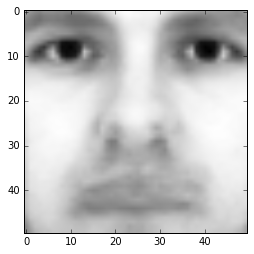

In [4]:
# 1-c Average Face
avg_face = train_data[0]
for i in range(0,2500):
    avg_face[i] = np.mean(train_data[:,i])
plt.imshow(avg_face.reshape(50,50), cmap = cm.Greys_r)

Training face after mean substraction.


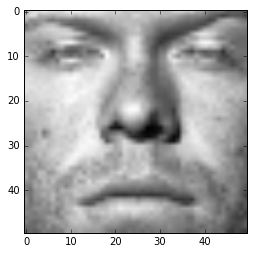

In [8]:
# 1-d Mean Subtraction
train_sub = train_data.copy()
test_sub = test_data.copy()
for i in range(0,540):
    train_sub[i] -= avg_face
for i in range(0,100):
    test_sub[i] -= avg_face    
print("Training face after mean substraction.")    
plt.imshow(train_sub[10].reshape(50,50), cmap = cm.Greys_r)
#print("Testing face after mean substraction.")
#plt.imshow(test_sub[10].reshape(50,50), cmap = cm.Greys_r)

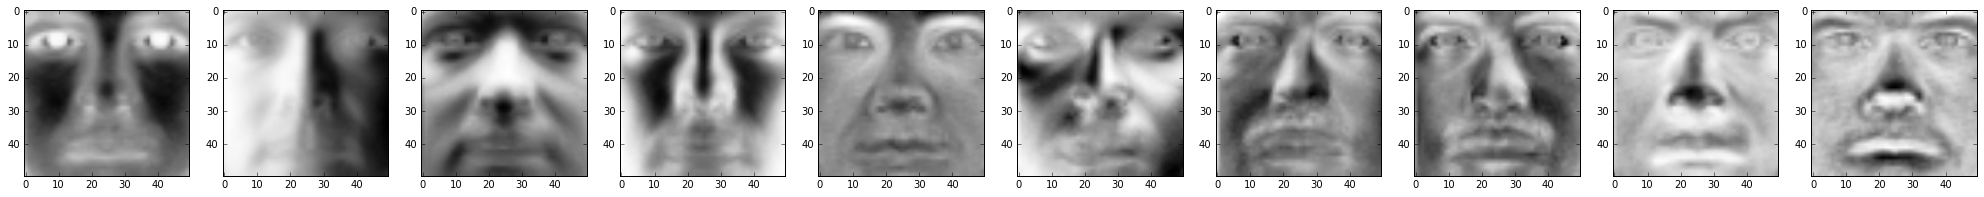

In [7]:
# 1-e Eigenface
U, s, V = np.linalg.svd(train_data)
V = np.array(V, dtype=float)
f, arr = plt.subplots(1, 10)
f.set_size_inches(35, 3)
for i in range(0,10):
    arr[i].imshow(V[i].reshape(50,50), cmap = cm.Greys_r)

0
20
40
60
80
100
120
140
160
180


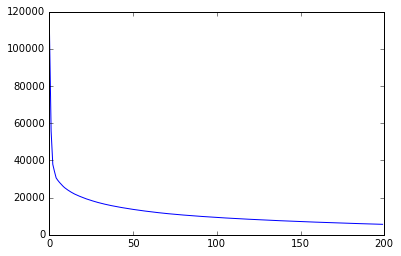

In [9]:
# 1-f Low-rank Approximation
X = []
R = list(range(0, 200))
for r in range(0, 200):
    Xr = np.zeros((len(U), len(V)))
    for i in range(r):
        Xr += s[i] * np.outer(U.T[i], V[i])
    X.append(np.linalg.norm(Xr - train_data))
plt.plot(R, X)    

In [28]:
# 1-g Eigenface Feature
def eigenface_feature(r):
    Vr = V[:r,:]
    F = np.dot(train_data, Vr.T)
    F_test = np.dot(test_data, Vr.T)
    return (F, F_test)

20
40
60
80
100
120
140
160
180
200


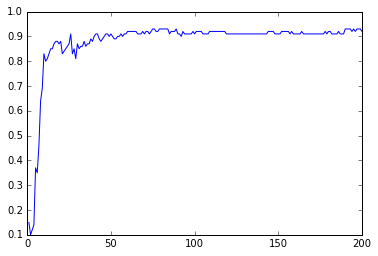

In [30]:
# 1-h Face Recognition
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
scores = []
R = list(range(1, 201))
for r in range(1, 201):
    F, F_test = eigenface_feature(r)
    log.fit(F, train_labels)
    scores.append(log.score(F_test, test_labels))
plt.plot(R, scores)